## Data visualization with Spark using matplotlib, seaborn, and pandas, 

A picture is proverbially worth a thousand words, and a chart is often better than a thousand rows of data. While notebooks in Fabric include a built in chart view for data that is displayed from a dataframe or Spark SQL query, it is not designed for comprehensive charting. However, you can use Python graphics libraries like matplotlib and seaborn to create charts from data in dataframes.

I’ll create an example script that analyzes and visualizes data from a hypothetical supermarket dataset. The dataset contains information about sales, including the product category, sales, date, payment method, and other relevant fields.

In [2]:

import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/Files/salesdata/Supermart Grocery Sales - Retail Analytics Dataset.csv"
df = pd.read_csv("/lakehouse/default/Files/salesdata/Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Display the first few rows to understand the dataset structure
print(df.head())

display(df)


StatementMeta(, 0ce39523-842f-4b08-a630-84f530b61802, 4, Finished, Available, Finished)

  Order_ID Customer_Name           Category   Sub_Category        City  \
0   OD2892         Sudha  Eggs, Meat & Fish        Chicken  Perambalur   
1   OD3822         Yusuf             Snacks        Cookies     Madurai   
2   OD5654         Hafiz             Snacks     Chocolates     Madurai   
3   OD5866           Ram          Beverages  Health Drinks  Perambalur   
4   OD6245         Sudha       Oil & Masala         Spices  Perambalur   

  Order_Date   Region  Sales  Discount  Profit       State  
0   3/1/2020    South   1784      0.26  499.52  Tamil Nadu  
1   3/1/2020     East    876      0.21  175.20  Tamil Nadu  
2   3/1/2020  Central   2421      0.33  266.31  Tamil Nadu  
3   3/1/2020     West    717      0.33   78.87  Tamil Nadu  
4   3/1/2020  Central    577      0.33   57.70  Tamil Nadu  


SynapseWidget(Synapse.DataFrame, fd028266-0697-4c2b-85cd-e50bfcd62020)

## Basic Visualization with Matplotlib
Let's create a simple bar plot to visualize the total sales per product category.

StatementMeta(, 0ce39523-842f-4b08-a630-84f530b61802, 7, Finished, Available, Finished)

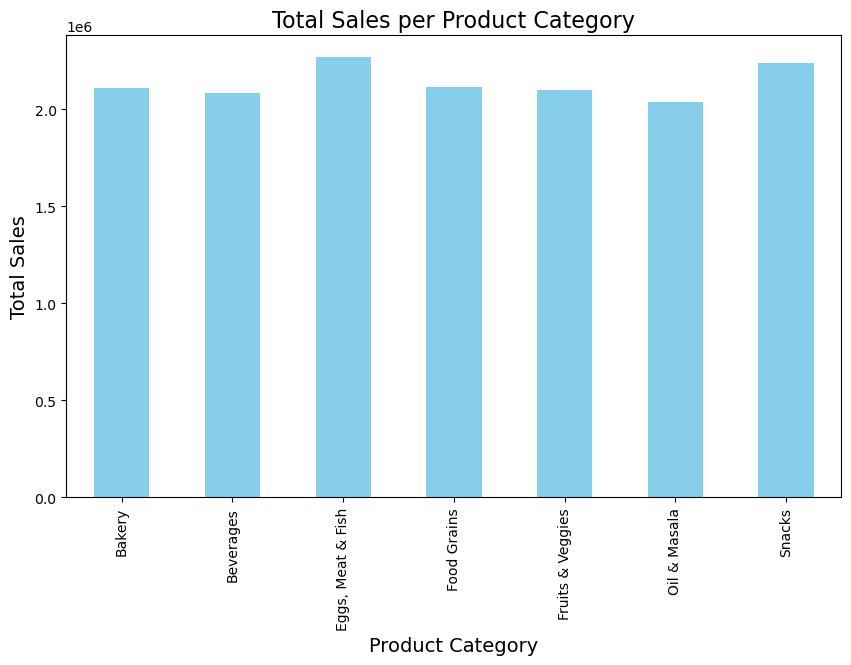

In [5]:
import matplotlib.pyplot as plt

# Grouping the data by product category and summing up the sales
sales_per_category = df.groupby('Category')['Sales'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
sales_per_category.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Total Sales per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Show plot
plt.show()


## Advanced Visualization with Seaborn
Seaborn is excellent for more sophisticated plots. Let's create a box plot to compare sales distributions across different cities.

StatementMeta(, 0ce39523-842f-4b08-a630-84f530b61802, 11, Finished, Available, Finished)

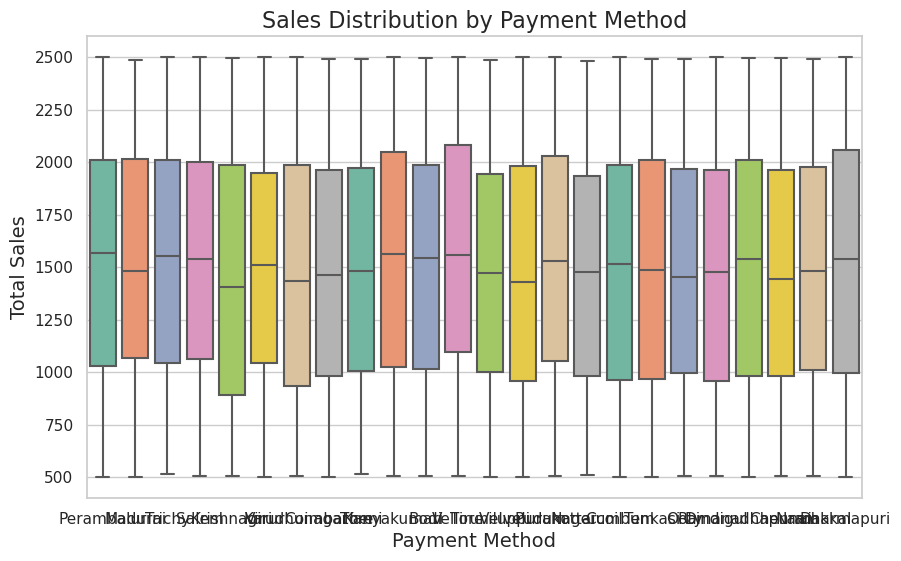

In [9]:
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Sales', data=df, palette="Set2")

# Adding title and labels
plt.title('Sales Distribution by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Show plot
plt.show()


## Time Series Analysis
Using matplotlib to plot sales over time can help in identifying trends.

StatementMeta(, 0ce39523-842f-4b08-a630-84f530b61802, 13, Finished, Available, Finished)

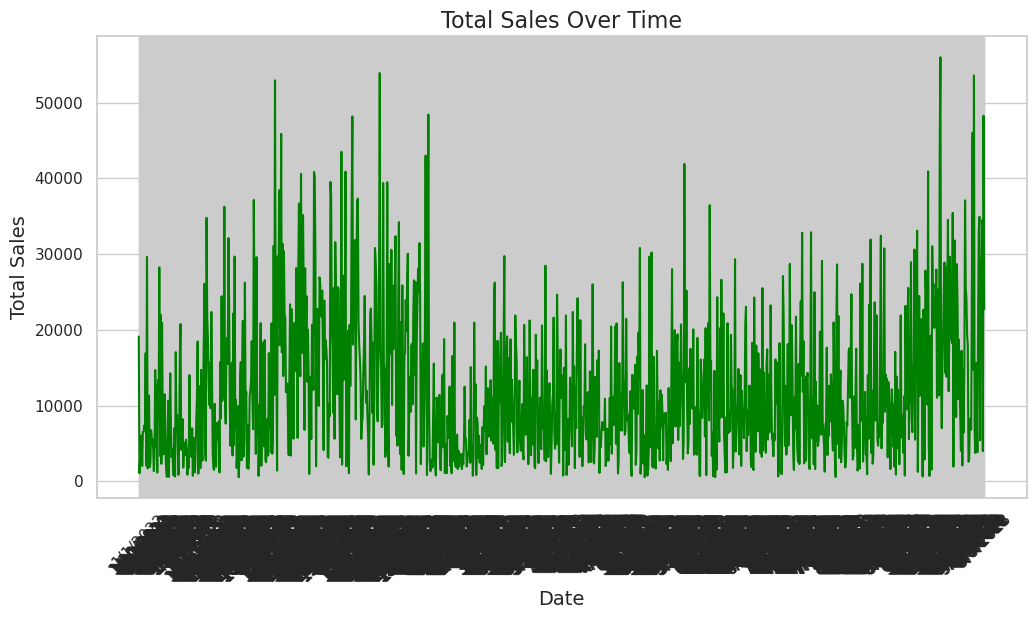

In [11]:
# Converting the date column to datetime
df['Date'] = pd.to_datetime(df['Order_Date'])

# Grouping by date and summing the sales
sales_over_time = df.groupby('Order_Date')['Sales'].sum()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, color='green')

# Adding title and labels
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


## Pie Chart for Sales by Payment Method
Finally, a pie chart to show the proportion of sales by different Product Category methods.

StatementMeta(, 0ce39523-842f-4b08-a630-84f530b61802, 16, Finished, Available, Finished)

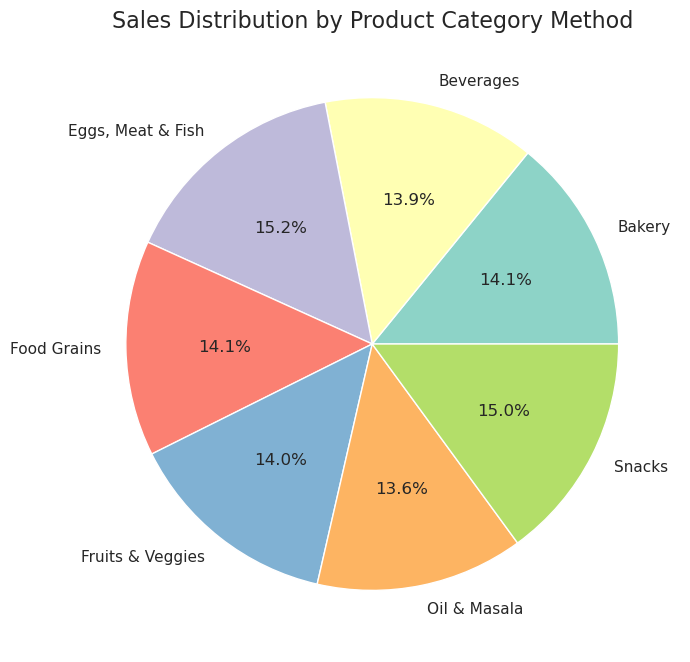

In [14]:
# Grouping the data by product category method and summing up the sales
sales_by_payment = df.groupby('Category')['Sales'].sum()

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(sales_by_payment, labels=sales_by_payment.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))

# Adding title
plt.title('Sales Distribution by Product Category Method', fontsize=16)

# Show plot
plt.show()


### Summary:
- Matplotlib is used for basic plots like bar charts and time series.
- Seaborn is leveraged for more advanced and aesthetically pleasing visualizations like box plots.
- Pandas is essential for data manipulation and grouping operations before visualization.

This script provides a broad overview of how to load a dataset, manipulate it with pandas, and visualize it using both matplotlib and seaborn. Each visualization technique gives insight into different aspects of the data, making it easier to understand and communicate the findings.